# AutoEQ - PEQ coefficients generator - for headphones

In [20]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [21]:
from pathfinder import Pathfinder

relative_paths = [['..', '..', '..', '..', '..', '..', '資料科學', 'Allen Downey', 'Think DSP', 'code'],
                  ['..', '..', '..', '..', 'AutoEq'],
                  ['..', 'codes']]

Pathfinder.append_relative_paths(relative_paths)

from drc.sound import Sound
from drc.tuners.response.equalizer import ResponseEqualizer
from drc.measurements.frequency.responses import FrequencyResponse
from drc.filters.peq import PEQs

# Microphone settings

In [22]:
from drc.measurements.frequency.calibrations.miniDSP import EAR, EARS

channels = {'left' : {'idx_channel': 0, 'fn_calibration': 'L_RAW_8603591.txt'},
            'right': {'idx_channel': 1, 'fn_calibration': 'R_RAW_8603591.txt'}}

ears = EARS()

for k in ears.ears.keys():
    ear = ears.ears[k]
    ear.load(channels[k]['fn_calibration'])

# Utilities for sampling

In [23]:
# from pprint import pprint

# pprint(Sound.scan_devices(0))

In [24]:
def probe(channel_name, n_samplings = 10):
    mic = ears.ears[channel_name]
    return mic.get_frequency_response(input_device_idx = 1, n_samplings = n_samplings)

def probe_channels():    
    for channel_name in channels.keys():     
        fr, _ = probe(channel_name)        
        fr.name = channel_name
        fr.plot_graph(raw_plot_kwargs= {'color': 'green', 'alpha': 0.5},
                      smoothed_plot_kwargs= {'color': 'red', 'alpha': 0.5});

# Read frequency response from csv file

In [25]:
model_name = 'KZ_EDR1'
model_name = 'QKZ_DM1'
# model_name = 'QCY_QS2'
# model_name = 'Apple EarPods'
# model_name = 'Beats Pro' 

In [7]:
# fn_measurement = f'c:\\Users\\Wei\\Desktop\\REW data\\{model_name} measurement.txt'
# fr_measurement = FrequencyResponse.read_from_csv(fn_measurement)

# Read frequency response from the Web
https://github.com/jaakkopasanen/AutoEq/tree/master/results  
https://github.com/jaakkopasanen/AutoEq/tree/master/measurements

In [8]:
model_name = 'Audeze LCD-X'
url_measurement = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/master/measurements/oratory1990/data/onear/Audeze%20LCD-X/Audeze%20LCD-X.csv'

model_name = 'Beats Pro'
url_measurement = 'https://github.com/jaakkopasanen/AutoEq/raw/c352d1c1223b79f1daa7ab03b0a51cda86c33794/measurements/oratory1990/data/onear/Beats%20Pro/Beats%20Pro.csv'

# model_name = 'AKG K371'
# url_measurement = 'https://github.com/jaakkopasanen/AutoEq/raw/c352d1c1223b79f1daa7ab03b0a51cda86c33794/results/oratory1990/harman_over-ear_2018/AKG%20K371/AKG%20K371.csv'

# model_name = 'Sennheiser HD650'
# url_measurement = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/master/measurements/oratory1990/data/onear/Sennheiser%20HD%20650/Sennheiser%20HD%20650.csv'

# model_name = 'Sennheiser HD600'
# url_measurement = 'https://github.com/jaakkopasanen/AutoEq/raw/c352d1c1223b79f1daa7ab03b0a51cda86c33794/results/oratory1990/harman_over-ear_2018/Sennheiser%20HD%20600/Sennheiser%20HD%20600.csv'

# model_name = 'Sennheiser HD560S'
# url_measurement = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/master/measurements/oratory1990/data/onear/Sennheiser%20HD%20560S/Sennheiser%20HD%20560S.csv'

# model_name = 'Sennheiser HD6XX'
# url_measurement = 'https://github.com/jaakkopasanen/AutoEq/raw/89fd05b88f74307f68b8673563c07c5fcfdf3e73/results/rtings/rtings_harman_over-ear_2018/Sennheiser%20HD%206XX/Sennheiser%20HD%206XX.csv'

# model_name = 'AKG K701'
# url_measurement = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/89fd05b88f74307f68b8673563c07c5fcfdf3e73/results/rtings/rtings_harman_over-ear_2018/AKG%20K701/AKG%20K701.csv'

# model_name = 'Beyerdynamic DT880'
# url_measurement = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/c352d1c1223b79f1daa7ab03b0a51cda86c33794/measurements/oratory1990/data/onear/Beyerdynamic%20DT%20880%20250%20Ohm/Beyerdynamic%20DT%20880%20250%20Ohm.csv'

# model_name = 'AKG N400'
# url_measurement = 'https://github.com/jaakkopasanen/AutoEq/raw/master/results/oratory1990/harman_in-ear_2019v2/AKG%20N400/AKG%20N400.csv'

# model_name = 'PSB M4U 8'
# url_measurement = 'https://github.com/jaakkopasanen/AutoEq/raw/master/results/oratory1990/harman_over-ear_2018/PSB%20M4U%208/PSB%20M4U%208.csv'

# model_name = 'Sony MDR-7506'
# url_measurement = 'https://github.com/jaakkopasanen/AutoEq/raw/89fd05b88f74307f68b8673563c07c5fcfdf3e73/results/oratory1990/harman_over-ear_2018/Sony%20MDR-7506/Sony%20MDR-7506.csv'


fr_measurement = FrequencyResponse.read_csv_from_url(url_measurement)
fr_measurement.name = model_name

# Plot

C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


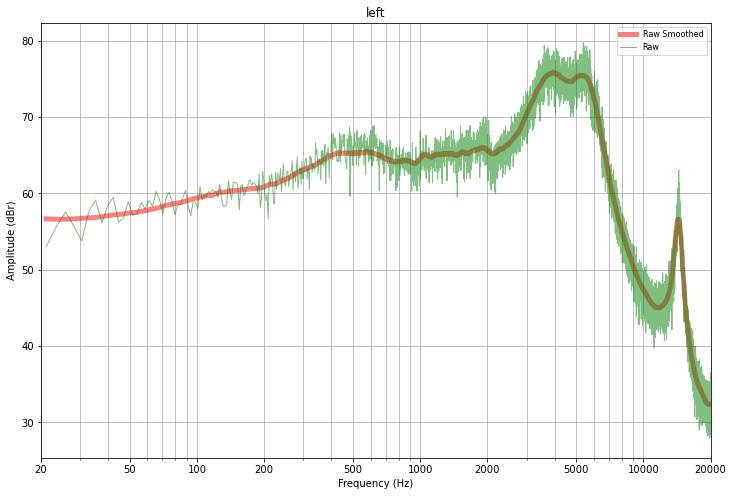

C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


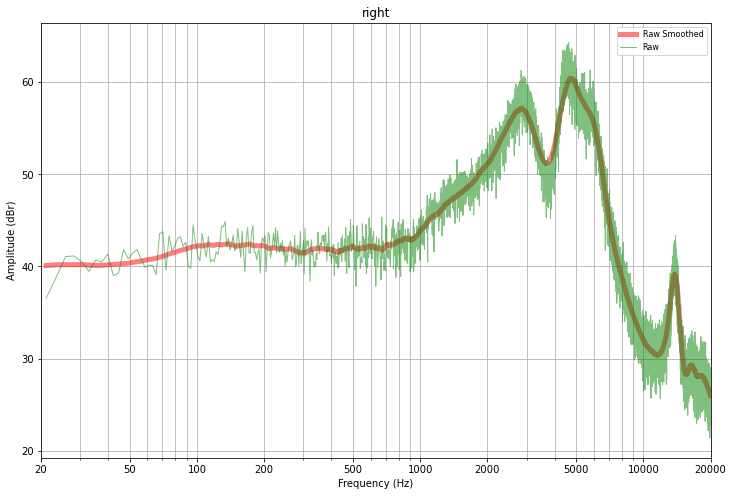

In [26]:
probe_channels()

# Compensation

In [27]:
# compensation_name = 'flat'
# compensation_path = 'compensation/zero.csv'

# compensation_name = 'harman_over-ear_2013'
# compensation_path = 'compensation/harman_over-ear_2013.csv'

compensation_name = 'harman_over-ear_2018'
compensation_path = 'compensation/harman_over-ear_2018.csv'

compensation = FrequencyResponse.read_from_csv(compensation_path)

# Other headphones as compensation

In [11]:
# compensation_name = 'Sennheiser HD560S'
# url_compensation = 'https://raw.githubusercontent.com/jaakkopasanen/AutoEq/master/measurements/oratory1990/data/onear/Sennheiser%20HD%20560S/Sennheiser%20HD%20560S.csv'

# compensation = FrequencyResponse.read_csv_from_url(url_compensation)

# Calculate and apply PEQ coefficients 

In [12]:
n_filters = 10
max_gain_dB = 12
bass_boost_gain = 0


def equalize(channel_name, compensation, n_filters, max_gain_dB, bass_boost_gain):

    _, fr_measurement = probe(channel_name)

    measurement, peqs, n_peq_filters, peq_max_gains = \
        ResponseEqualizer.get_peq_filters(fr_measurement,
                                          compensation,
                                          max_filters = n_filters,
                                          max_gain_dB = max_gain_dB,
                                          bass_boost_gain = bass_boost_gain)
    
    fn_filter_settings = f'results/{model_name} to {compensation_name} {channel_name} channel PEQ filters.txt'
    peqs.dump(fn_filter_settings)  
    
    return measurement, peqs


def equalize_channels():    
    for channel_name in channels.keys():
        measurement, peqs = equalize(channel_name, compensation,
                                     n_filters = n_filters, max_gain_dB = max_gain_dB,
                                     bass_boost_gain = bass_boost_gain)

In [13]:
equalize_channels()

C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


# Load and apply PEQ settings

In [14]:
import pandas as pd

peqs = PEQs()

for channel_name in channels.keys():
    fn_filter_settings = f'results/{model_name} to {compensation_name} {channel_name} channel PEQ filters.txt'
    peqs.load(fn_filter_settings) 
    
    print(fn_filter_settings)
    print(pd.DataFrame(peqs.param_sets))
    print()    

results/KZ_EDR1 to harman_over-ear_2018 left channel PEQ filters.txt
  type  freq_Hz  gain_dB      Q
0   PK     39.8    1.371  1.014
1   PK     64.7   -8.880  0.321
2   PK    694.7    3.111  1.239
3   PK   1212.7    1.994  1.273
4   PK   2169.8    2.800  2.079
5   PK   3173.7   -3.984  2.799
6   PK   4862.3    5.047  2.943
7   PK  12039.6    6.130  1.170
8   PK  18818.2   11.611  0.421

results/KZ_EDR1 to harman_over-ear_2018 right channel PEQ filters.txt
  type  freq_Hz  gain_dB      Q
0   PK     37.9    2.203  0.432
1   PK    131.4   -4.545  0.508
2   PK    337.6   -4.310  1.376
3   PK    871.4    6.488  0.293
4   PK   1298.1   -5.431  0.902
5   PK   3007.7   -5.166  3.426
6   PK  11963.3    5.343  1.116
7   PK  18767.4   10.540  0.538



C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


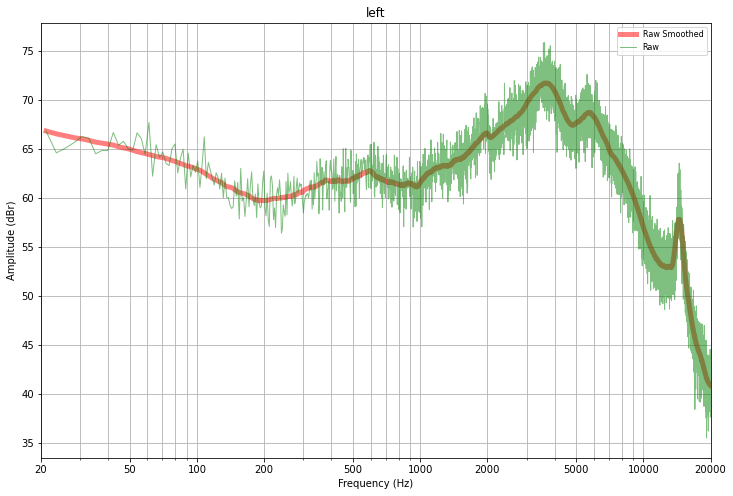

C:\Softwares\Python\lib\site-packages\numpy\fft\_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


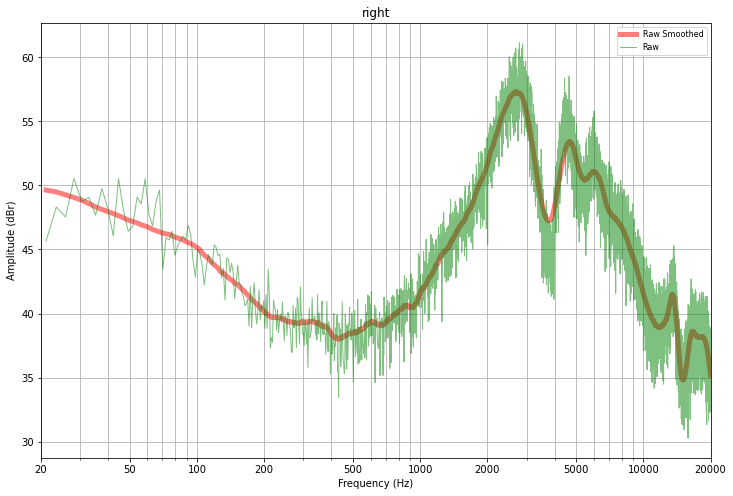

In [31]:
# Apply the filters with Equalizer APO before probing.

probe_channels()